# 유방암 데이터
- 10, 5, 2 차원으로 차원축소
- 원본과 차원축소한 데이터의 분류 정화도 측정
- 2차원으로 축소한 것은 시각화

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [3]:
col_names = list(bc.feature_names)
col_names.append('target')

df = pd.DataFrame(np.c_[bc.data,bc.target], columns=col_names)  # 배열 붙이기
df.head()  

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

# 차원 축소 전 시각화

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

요소들은 각각 mean, se, worst 3가지 변수를 가지게 되는데, mean은 평균, se는 표준오차, worst는 각 특성의 가장 큰 값 3개의 평균을 의미
예를 들어, radius_mean과 radius_se는 각각 종양의 반지름과 표준오차를 뜻하며, radius_worst는 가 장 반지름이 큰 종양 3개의 평균 반지름을 의미

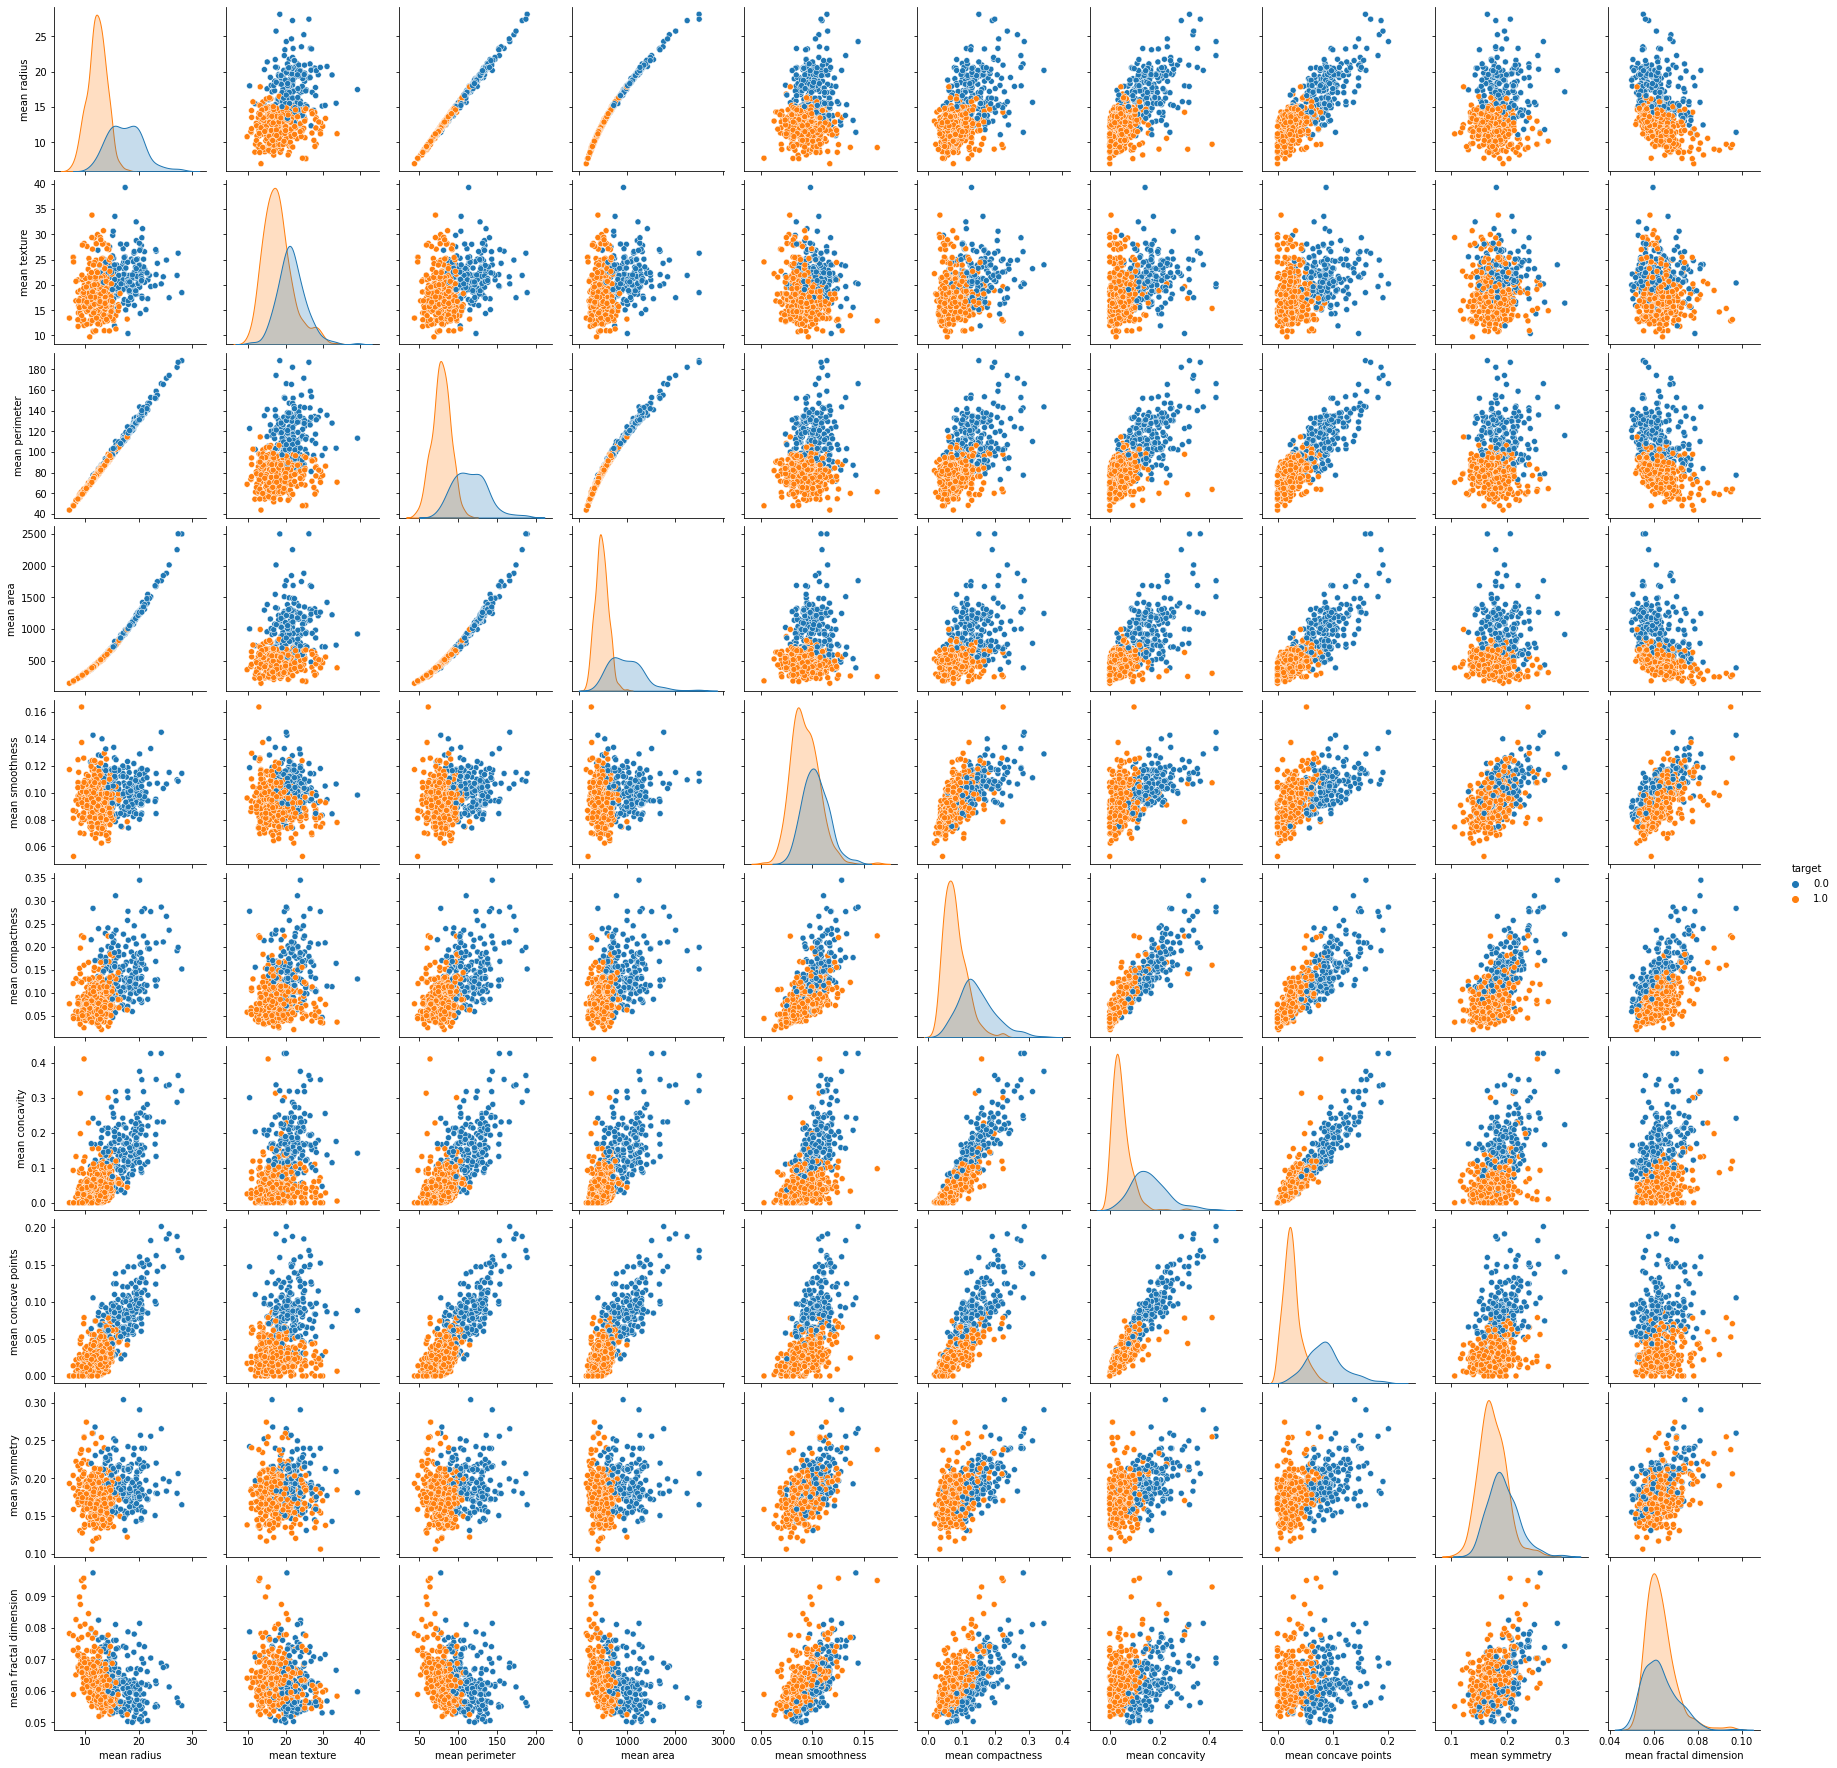

In [5]:
# mean 변수들로 pairplot 그리기
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']) 
# vars : list of variable names
    # Variables within ``data`` to use, otherwise use every column with

## ※ 설명변수들 간 선형관계가 보이는 것으로 보아 다중공선성이 존재한다는 것을 알 수 있음.

<AxesSubplot:>

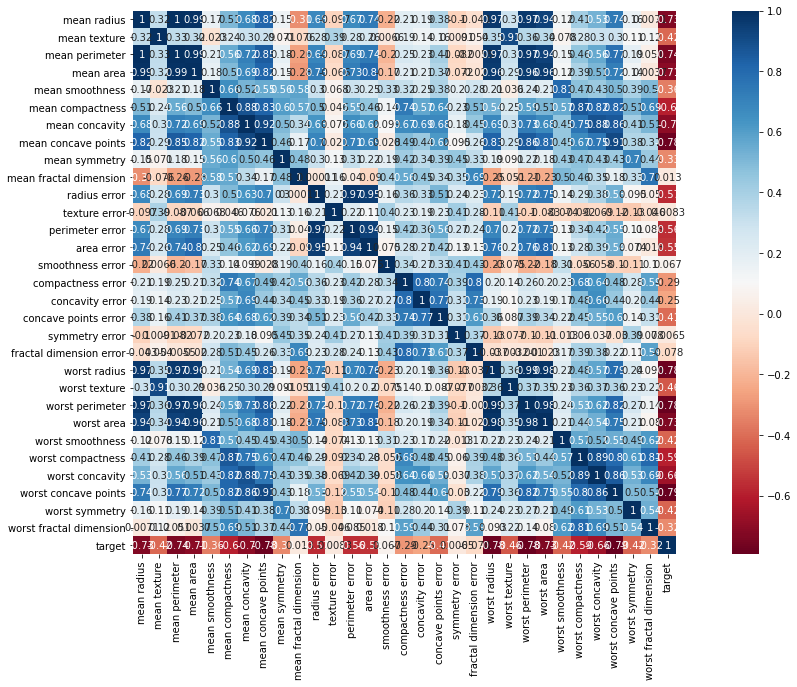

In [6]:
# 설명변수들 간의 상관관계
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,square=True,cmap='RdBu') 
# annot=True 데이터 값 셀 안에 적어줌
# square=True 정사각형으로 출력
# Color Brewer 팔레트 중 diverging : Diverging 팔레트는 양쪽으로 강조가 되기 때문에 낮은 값과 높은 값에 모두 관심을 가져야 하는 데이터 세트에 적합.

In [7]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bc_std = scaler.fit_transform(bc.data)

# PCA(10D)

In [8]:
# 정규화한 후 pca 실행(10차원)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [9]:
bc_pca = pca.fit_transform(bc_std)
bc_pca[:5]

array([[ 9.19283683,  1.94858307, -1.12316617,  3.6337309 , -1.19511015,
         1.41142441,  2.15936937, -0.39840385, -0.15713417, -0.87741326],
       [ 2.3878018 , -3.76817174, -0.52929268,  1.11826386,  0.62177497,
         0.02865636,  0.01335829,  0.24098733, -0.7118965 ,  1.10699895],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208267, -0.17708587,
         0.54145218, -0.66816589,  0.09736917,  0.02408386,  0.45429097],
       [ 7.1229532 , 10.27558912, -3.23278953,  0.15254703, -2.96087833,
         3.05342192,  1.42991183,  1.05955654, -1.4054014 , -1.11694675],
       [ 3.93530207, -1.94807157,  1.38976672,  2.94063934,  0.54674741,
        -1.22649463, -0.93621271,  0.63637734, -0.26380947,  0.37769934]])

In [10]:
pca.explained_variance_ratio_
# 합산한 결과, 93%로 설명력이 매우 높다는 것을 알 수 있다.

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

## PCA 전후 분류 비교

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
# PCA 전
X_train, X_test, y_train, y_test = train_test_split(
    bc.data, bc.target, stratify=bc.target, random_state=2021
)
# PCA 전 정확도
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9090909090909091

In [13]:
# PCA 이후
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca, bc.target, stratify=bc.target, random_state=2021
)
# PCA 이후 정확도
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9790209790209791

▶ 원본의 정확도는 91%, 10차원으로 축소한 데이터의 분류 정확도는 약 98%이다.

차원축소한 결과, 정확도가 매우 높아졌음을 알 수 있다.

# PCA(5D)

In [14]:
# 정규화한 후 pca 실행(5차원)
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [15]:
bc_pca = pca.fit_transform(bc_std)
bc_pca[:5]

array([[ 9.19283683,  1.94858306, -1.12316639,  3.63373372, -1.19511016],
       [ 2.3878018 , -3.76817174, -0.52929253,  1.11826203,  0.62177492],
       [ 5.73389628, -1.07517379, -0.55174767,  0.91208283, -0.17708628],
       [ 7.1229532 , 10.27558913, -3.23278961,  0.15254726, -2.96087852],
       [ 3.93530207, -1.94807156,  1.38976681,  2.94063869,  0.54674771]])

In [16]:
pca.explained_variance_ratio_
# 합산한 결과, 84%로 설명력이 10차원떄의 설명력보다는 높지 않다는 것을 알 수 있다.

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

## PCA 전후 분류 비교

In [17]:
# PCA 이후
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca, bc.target, stratify=bc.target, random_state=2021
)
# PCA 이후 정확도
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.951048951048951

▶ 원본의 정확도는 91%, 5차원으로 축소한 데이터의 분류 정확도는 약 95%이다.

차원축소한 결과, 정확도가 높아졌음을 알 수 있다.

# PCA(2D)

In [18]:
# 정규화한 후 pca 실행
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [19]:
bc_pca = pca.fit_transform(bc_std)
bc_pca[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [20]:
pca.explained_variance_ratio_
# 첫번째 성분은 데이터를 설명하는데 있어 44%의 설명력을 갖고 있고
# 두번째 성분은 19%의 설명력을 갖고 있다.
# 약 63%의 설명력을 갖고 있으므로 할만하다.

array([0.44272026, 0.18971182])

## PCA 변환후 시각화

In [21]:
bc_pca_df = pd.DataFrame(bc_pca, columns=['PC1','PC2'])
bc_pca_df['target'] = bc.target
bc_pca_df.head()

PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0

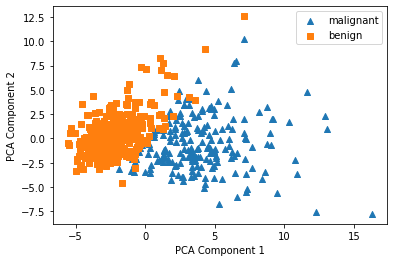

In [22]:
markers = ['^','s']

for i, marker in enumerate(markers):
    x_axis_data = bc_pca_df[bc_pca_df.target == i]['PC1']
    y_axis_data = bc_pca_df[bc_pca_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=bc.target_names[i])
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## PCA 전후 분류 비교

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
# PCA 이후
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca, bc.target, stratify=bc.target, random_state=2021
)
# PCA 이후 정확도
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.916083916083916

▶ 원본의 정확도는 91%, 2차원으로 축소한 데이터의 분류 정확도는 약 92%이다.